In [117]:
import matplotlib.pyplot as plt
import numpy as np

In [116]:
noRequests = 360
maxTime = 100000

perfectInterval = maxTime/noRequests
#print(f"Perfect Interval: {perfectInterval:.1f}\n")

noSamples = 100000

dynamismArray= np.empty(noSamples)

for sample in range(noSamples):
    times = np.random.randint(1,maxTime+1, noRequests)
    
    deltaTimes = np.empty(noRequests-1)
    deviations = np.empty(noRequests-1)
    
    # First example from paper
    #times =np.array([0.9,1,3,3.1,5.1,5.2,7.2,7.3,9.3,9.4])
    # Second example from paper
    #times =np.array([.5,.6,.7,.8,.9,1,3,5,7,9])
    
    times.sort()
    
    #print(f"Zeiten: {[f'{x:.1f}'for x in times]}")
    
    for i in range(len(times)-1):
        deltaTimes[i] = times[i+1]-times[i]
    
    #print(f"Zeitabstände: {[f'{x:.1f}'for x in deltaTimes]}")
    
    # Handle first value seperate
    if deltaTimes[0] < perfectInterval:
        deviations[0] = perfectInterval - deltaTimes[0]
    else:
        deviations[0] = 0
    
    # Intialize with value of first entry which is always the perfectInterval value
    maxPossibleDeviation = perfectInterval
    
    for i in range(1,len(deltaTimes)):
        if deltaTimes[i] < perfectInterval:
            deviationsWithoutPenalty = (perfectInterval - deltaTimes[i])
            recursivePenalty = deviationsWithoutPenalty / perfectInterval * deviations[i-1]
            deviations[i] = deviationsWithoutPenalty + recursivePenalty
            maxPossibleDeviation += perfectInterval + recursivePenalty
        else:
            deviations[i] = 0
            maxPossibleDeviation += perfectInterval
    
    deviation = deviations.sum()
    
    dynamism = 1 - (deviation/maxPossibleDeviation)
    
    dynamismArray[sample] = dynamism
    #print(f"Deviations: {[f'{x:.1f}'for x in deviations]}")
    
    #print(f"Deviation: {deviation:.2f}")
    #print(f"Max. possible Deviation: {maxPossibleDeviation:.2f}")
    #print(f"Dynamik: {dynamism*100:.1f}%\n")


print(f"Durchschnittliche Dynamik: {dynamismArray.mean()*100:.1f}%")
print(f"Deviation der Dynamik: {dynamismArray.std()*100:.1f}%")

Durchschnittliche Dynamik: 52.2%
Deviation der Dynamik: 2.1%


Zeiten: ['1.1', '1.9', '2.4', '3.5', '6.0', '6.1', '7.9', '8.2', '8.5', '9.2']
Zeitabstände: ['0.8', '0.5', '1.1', '2.5', '0.1', '1.8', '0.3', '0.3', '0.7']
Deviations: ['0.2', '0.6', '0.0', '0.0', '0.9', '0.0', '0.7', '1.2', '0.7']
Deviation: 4.25
Max. possible Deviation: 9.95
Dynamik: 57.3%



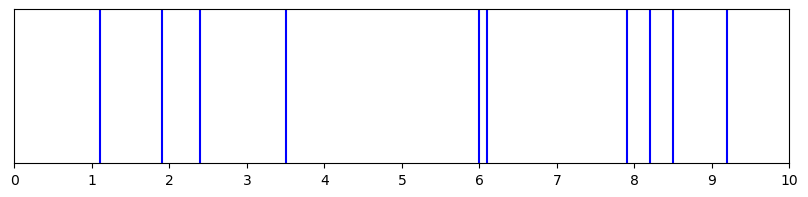

In [104]:
noRequests = 10
maxTime = 10
timeResolution = 0.1

perfectInterval = maxTime/noRequests
#print(f"Perfect Interval: {perfectInterval:.1f}\n")

times = np.random.randint(1,maxTime/timeResolution + 1, noRequests) * timeResolution
deltaTimes = np.empty(noRequests-1)
deviations = np.empty(noRequests-1)

# First example from paper
#times =np.array([0.9,1,3,3.1,5.1,5.2,7.2,7.3,9.3,9.4])
# Second example from paper
#times =np.array([.5,.6,.7,.8,.9,1,3,5,7,9])

times.sort()

print(f"Zeiten: {[f'{x:.1f}'for x in times]}")

for i in range(9):
    deltaTimes[i] = times[i+1]-times[i]

print(f"Zeitabstände: {[f'{x:.1f}'for x in deltaTimes]}")

# Handle first value seperate
if deltaTimes[0] < perfectInterval:
    deviations[0] = perfectInterval - deltaTimes[0]
else:
    deviations[0] = 0

# Intialize with value of first entry which is always the perfectInterval value
maxPossibleDeviation = perfectInterval

for i in range(1,len(deltaTimes)):
    if deltaTimes[i] < perfectInterval:
        deviationsWithoutPenalty = (perfectInterval - deltaTimes[i])
        recursivePenalty = deviationsWithoutPenalty / perfectInterval * deviations[i-1]
        deviations[i] = deviationsWithoutPenalty + recursivePenalty
        maxPossibleDeviation += perfectInterval + recursivePenalty
    else:
        deviations[i] = 0
        maxPossibleDeviation += perfectInterval

deviation = deviations.sum()

dynamism = 1 - (deviation/maxPossibleDeviation)

print(f"Deviations: {[f'{x:.1f}'for x in deviations]}")

print(f"Deviation: {deviation:.2f}")
print(f"Max. possible Deviation: {maxPossibleDeviation:.2f}")
print(f"Dynamik: {dynamism*100:.1f}%\n")

plt.figure(figsize=(10,2))
#plt.hlines(1,0,10)  # Draw a horizontal line
plt.eventplot(times, orientation='horizontal', colors='b', lineoffsets=0.5)
#plt.gca().axes.get_yaxis().set_visible(False)
plt.gca().set(xlim=(0, 10), xticks=np.arange(0, 11),
       ylim=(0, 1), yticks=[])
plt.show()

In [ ]:
noRequests = 10
maxTime = 10
timeResolution = 0.1

perfectInterval = maxTime/noRequests
#print(f"Perfect Interval: {perfectInterval:.1f}\n")

times = np.empty(noRequests)
deltaTimes = np.empty(noRequests-1)
deviations = np.empty(noRequests-1)

# Generate values with normal distributed distance around perfect interval
t = 0
for i in range(noRequests):
    t = round(t + np.random.normal(perfectInterval, 0.25), 1)
    times[i] = t%maxTime

# First example from paper
#times =np.array([0.9,1,3,3.1,5.1,5.2,7.2,7.3,9.3,9.4])
# Second example from paper
#times =np.array([.5,.6,.7,.8,.9,1,3,5,7,9])

times.sort()

print(f"Zeiten: {[f'{x:.1f}'for x in times]}")

for i in range(9):
    deltaTimes[i] = times[i+1]-times[i]

print(f"Zeitabstände: {[f'{x:.1f}'for x in deltaTimes]}")

# Handle first value seperate
if deltaTimes[0] < perfectInterval:
    deviations[0] = perfectInterval - deltaTimes[0]
else:
    deviations[0] = 0

# Intialize with value of first entry which is always the perfectInterval value
maxPossibleDeviation = perfectInterval

for i in range(1,len(deltaTimes)):
    if deltaTimes[i] < perfectInterval:
        deviationsWithoutPenalty = (perfectInterval - deltaTimes[i])
        recursivePenalty = deviationsWithoutPenalty / perfectInterval * deviations[i-1]
        deviations[i] = deviationsWithoutPenalty + recursivePenalty
        maxPossibleDeviation += perfectInterval + recursivePenalty
    else:
        deviations[i] = 0
        maxPossibleDeviation += perfectInterval

deviation = deviations.sum()

dynamism = 1 - (deviation/maxPossibleDeviation)

print(f"Deviations: {[f'{x:.1f}'for x in deviations]}")

print(f"Deviation: {deviation:.2f}")
print(f"Max. possible Deviation: {maxPossibleDeviation:.2f}")
print(f"Dynamik: {dynamism*100:.1f}%\n")

plt.figure(figsize=(10,2))
#plt.hlines(1,0,10)  # Draw a horizontal line
plt.eventplot(times, orientation='horizontal', colors='b', lineoffsets=0.5)
#plt.gca().axes.get_yaxis().set_visible(False)
plt.gca().set(xlim=(0, 10), xticks=np.arange(0, 11),
       ylim=(0, 1), yticks=[])
plt.show()

In [218]:
bins=10000
noOfHitsOverAllBins=10

p_sum = np.zeros(bins)
n_sum = np.zeros(bins)

for _ in range(100000):
    n = np.random.randint(0,bins,noOfHitsOverAllBins)
    for x in n:
        n_sum[x] += 1
    

    p = np.random.poisson(noOfHitsOverAllBins/bins,bins)
    p_sum += p

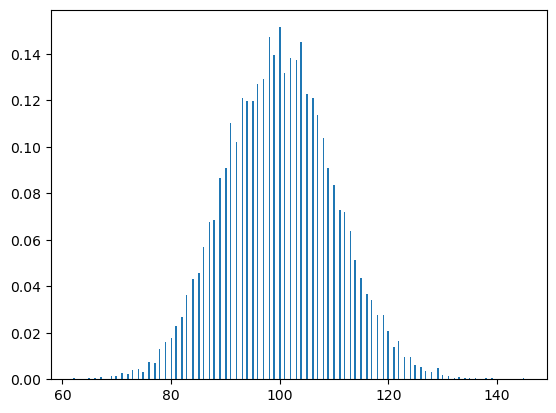

In [233]:
count, bins, ignored = plt.hist(n_sum, 300, density=True)

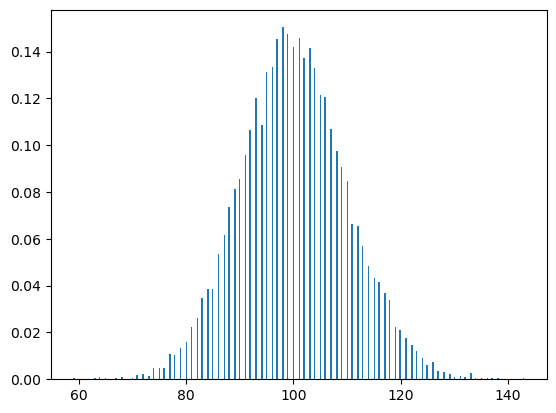

In [234]:
count, bins, ignored = plt.hist(p_sum, 300, density=True)